In [13]:
import nengo
import multiprocessing
import numpy as np
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from hashids import Hashids
import cpg_search
reload(cpg_search)
import cpg_search.run_motif_search
reload(cpg_search.run_motif_search)
import cpg_search.utils
reload(cpg_search.utils)
import cpg_search.plotting
reload(cpg_search.plotting)
from cpg_search.run_motif_search import *
from cpg_search.utils import *
from cpg_search.plotting import *
import os
import scipy
from tqdm import tqdm

In [14]:
def load_file(fn):
    pass


Phase diff 4.96671856672
Phase diff 0.705570361896


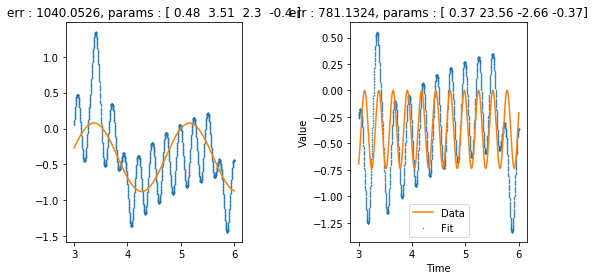

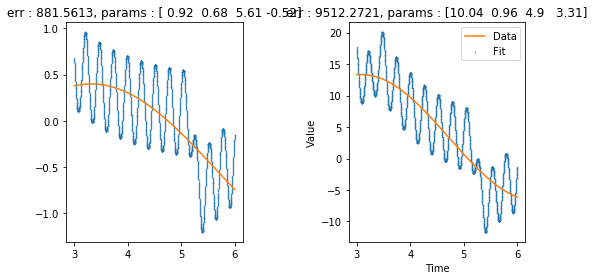

In [15]:
path = './data_s2_s0_f_sc-1'
# Generator over filenames so they're not loaded into memory
_fr,_dirname,files = os.walk(path).next()
# files = ['oRcLcZcqfYfQcWcqcDcofqcXcOcncxfZcgfLc7cocrcpcVc8cRc1cWfjcQc7c6cE.pkl']
def fix_amp_phase(params):
    new_params = list(params)
    new_params[0] = np.abs(params[0])
    new_params[2] = params[2]  if params[0] >= 0 else params[2] + np.pi
    return tuple(new_params)
for i,fn in enumerate(files):
    with open(os.path.join(path,fn), 'rb') as fp:
        ret = pickle.load(fp)
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    ret['motor_values'] = np.array(ret['motor_values'])
#     tslc = slice(1000,None)
    tslc = slice(3000,6000)
    
    ax[0].scatter(ret['time'][tslc], ret['motor_values'][tslc,0], s=0.2)
    ax[1].scatter(ret['time'][tslc], ret['motor_values'][tslc,1], s=0.2)
    params, cov,err,yhat = fit_curve(ret, tslc, motor_id=0)
    params = fix_amp_phase(params)
    c1 = params[2]
    ax[0].plot(ret['time'][tslc], yhat, color='tab:orange')
    ax[0].title.set_text("err : {}, params : {}".format(np.round(err,4),np.round(params,2)))
    
    params, cov,err,yhat = fit_curve(ret, tslc, motor_id=1)
    params = fix_amp_phase(params)
    c2 = params[2]
    ax[1].plot(ret['time'][tslc], yhat, color='tab:orange')
    ax[1].title.set_text("err : {}, params : {}".format(np.round(err,4),np.round(params,2)))
    print('Phase diff {}'.format((c1-c2) % (2*np.pi)) )
#     params[0] = 0.001
    
    ax[1].legend(['Data','Fit'])
    ax[1].set_ylabel('Value')
    ax[1].set_xlabel('Time')
    plt.tight_layout()
    if i > 0:
        break

        
#     with ) as fp:



In [16]:
datafiles = os.listdir(path)

In [17]:
df = pd.DataFrame(columns=['err1','cov1','a1','b1','c1','e1','err2','cov2','a2','b2','c2','e2','fit1', 'fit2'])

In [18]:


for i,fn in tqdm(enumerate(datafiles), total=len(datafiles)):
    with open(os.path.join(path,fn), 'rb') as fp:
        ret = pickle.load(fp)
    # Choosing the t slice is important -- too long and it will have difficulty fitting
    tslc = slice(3000,6000)
#     tslc = slice(1000, None)
    
    ret['motor_values'] = np.array(ret['motor_values'])
    params, cov,err,fit = fit_curve(ret, tslc, motor_id=0)
    df.loc[fn, 'err1'] = err
    df.loc[fn, 'cov1'] = [cov]
    
    df.loc[fn, 'fit1'] = [fit]
    df.loc[fn, ['a1','b1','c1','e1']] = fix_amp_phase(params)
    params, cov,err,fit = fit_curve(ret, tslc, motor_id=1)
    df.loc[fn, 'err2'] = err
    df.loc[fn, 'cov2'] = [cov]
    df.loc[fn, 'fit2'] = [fit]
    df.loc[fn, ['a2','b2','c2','e2']] = fix_amp_phase(params)
    
    

100%|██████████| 1600/1600 [03:23<00:00,  7.88it/s]


In [19]:
df.to_pickle('sin_fit_results_df_s2_f_sc-1.pkl')